# **Tugas**

Buatlah model CNN untuk klasifikasi dataset MNIST.

### **Langkah 1 - Import Library**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### **Langkah 2 - Unduh Dataset MNIST**

In [2]:
# Load dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape data agar cocok dengan input CNN (28x28x1 untuk grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalisasi nilai piksel ke rentang 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0


### **Langkah 3 - Visualisasi Data**

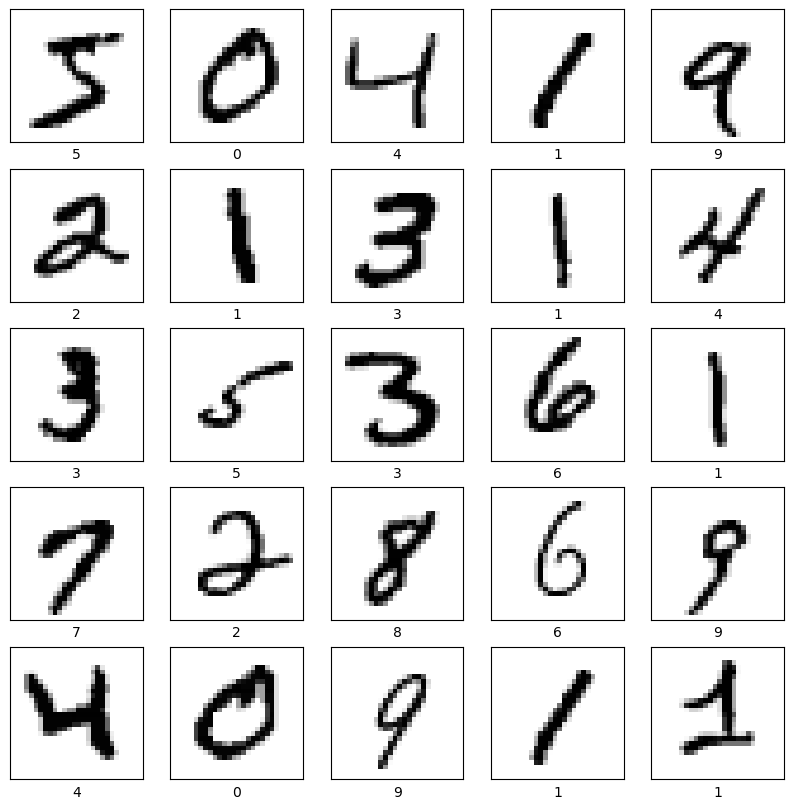

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


### **Langkah 4 - Buat Model CNN**

In [4]:
model = models.Sequential()

# Layer konvolusi pertama dengan 32 filter, kernel size 3x3, dan fungsi aktivasi ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Layer pooling pertama dengan ukuran 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Layer konvolusi kedua dengan 64 filter, kernel size 3x3, dan fungsi aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer pooling kedua dengan ukuran 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Layer konvolusi ketiga dengan 64 filter, kernel size 3x3, dan fungsi aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten layer untuk mengubah output dari 2D menjadi 1D
model.add(layers.Flatten())

# Fully connected layer dengan 64 neuron
model.add(layers.Dense(64, activation='relu'))

# Output layer dengan 10 neuron (untuk 10 kelas digit 0-9)
model.add(layers.Dense(10, activation='softmax'))


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Langkah 5 - Compile Model**

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### **Langkah 6 - Train Model**

In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8971 - loss: 0.3317 - val_accuracy: 0.9832 - val_loss: 0.0527
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9849 - loss: 0.0504 - val_accuracy: 0.9885 - val_loss: 0.0364
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.9892 - loss: 0.0337 - val_accuracy: 0.9868 - val_loss: 0.0404
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9921 - val_loss: 0.0279
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accuracy: 0.9898 - val_loss: 0.0350
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9948 - loss: 0.0148 - val_accuracy: 0.9899 - val_loss: 0.0276
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9963 - loss: 0.0109 - val_accuracy: 0.9907 - val_loss: 0.0303
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9972 -

### **Langkah 7 - Evaluasi Model**

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 2s - 5ms/step - accuracy: 0.9920 - loss: 0.0324
Test accuracy: 0.9919999837875366


### **Langkah 8 - Visualisasi Akurasi dan Loss**

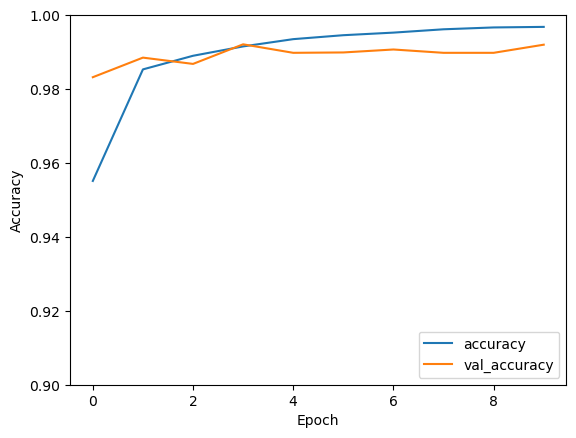

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()
